In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_theme()

# First look

In [2]:
df = pd.read_csv('../data/songs.csv');

In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)));

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,8), sharey=True)
sns.scatterplot(data=df, x="loudness", y="energy", hue='explicit', ax=axs[0])
sns.scatterplot(data=df, x="acousticness", y="energy", hue='explicit', ax=axs[1]);

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

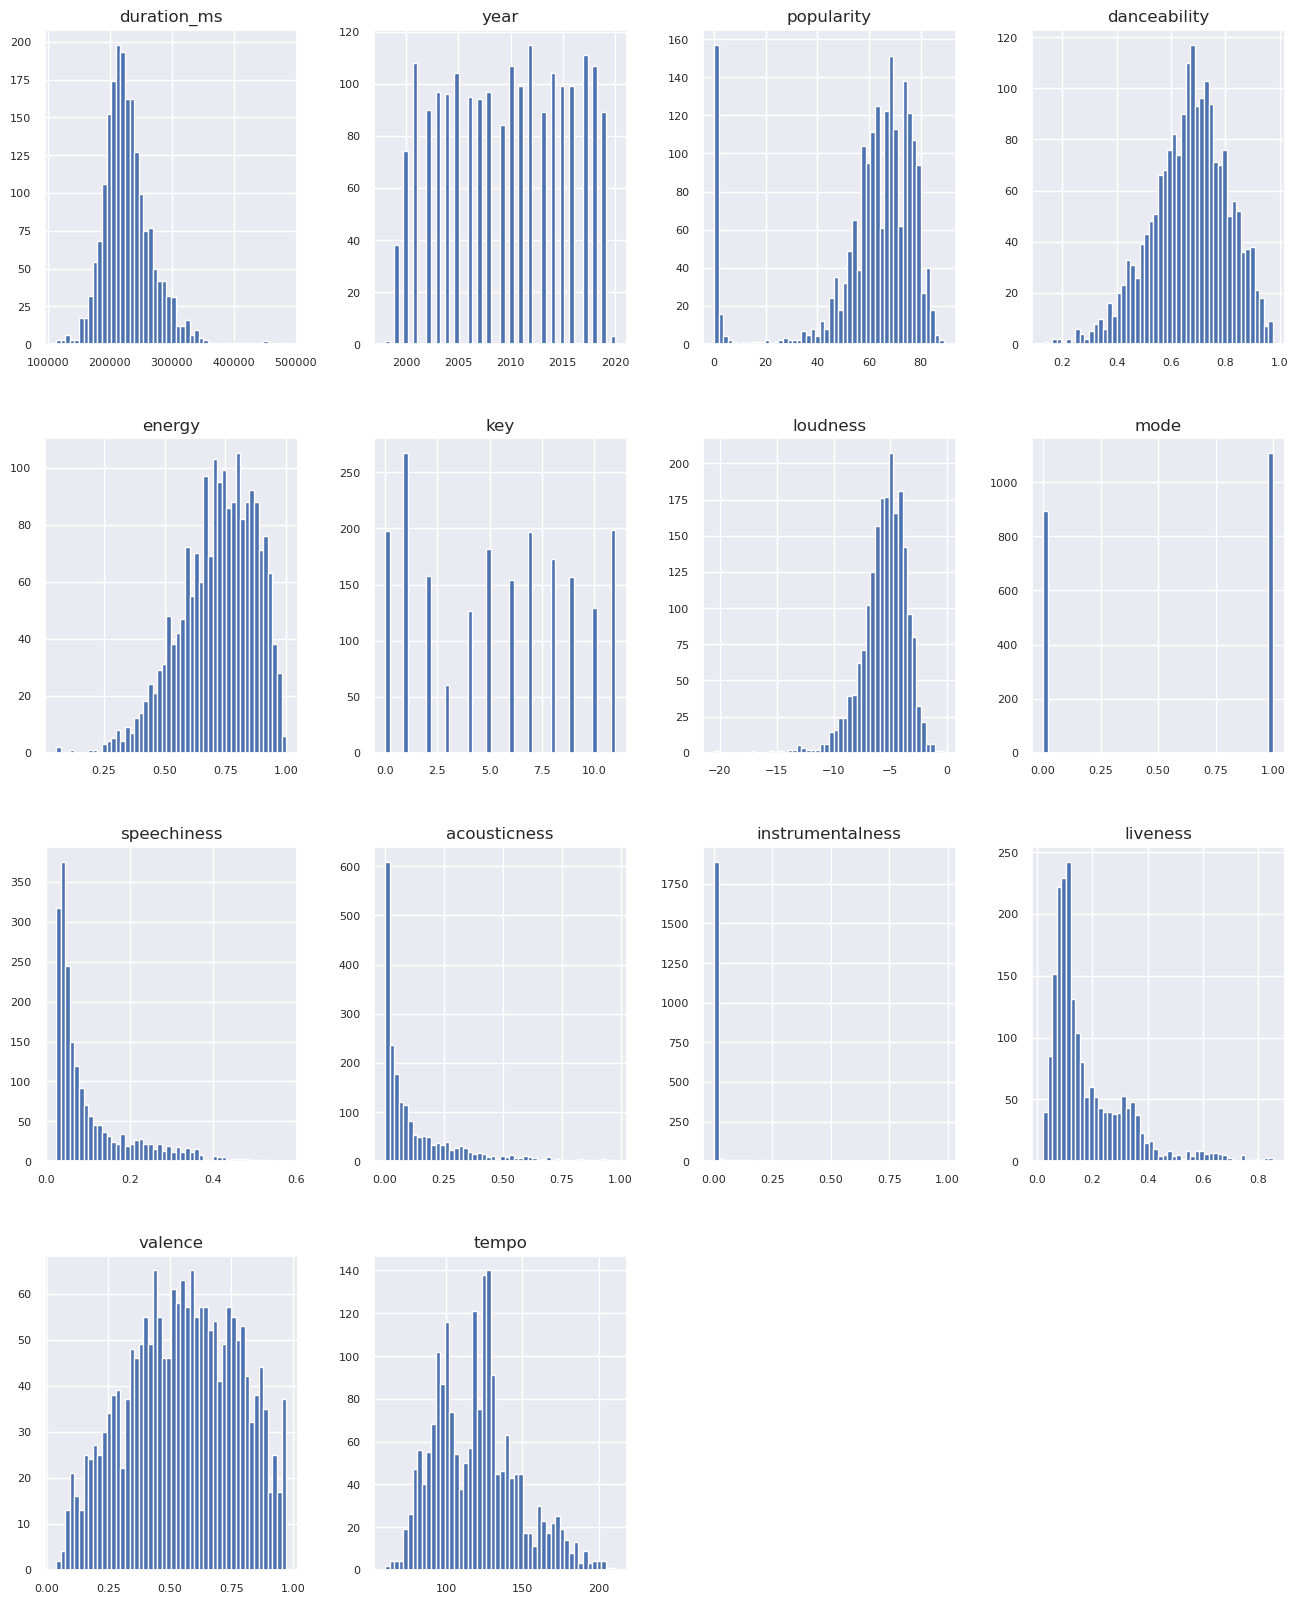

In [29]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Genre

In [7]:
df_genre_gb = df.groupby(["genre"])

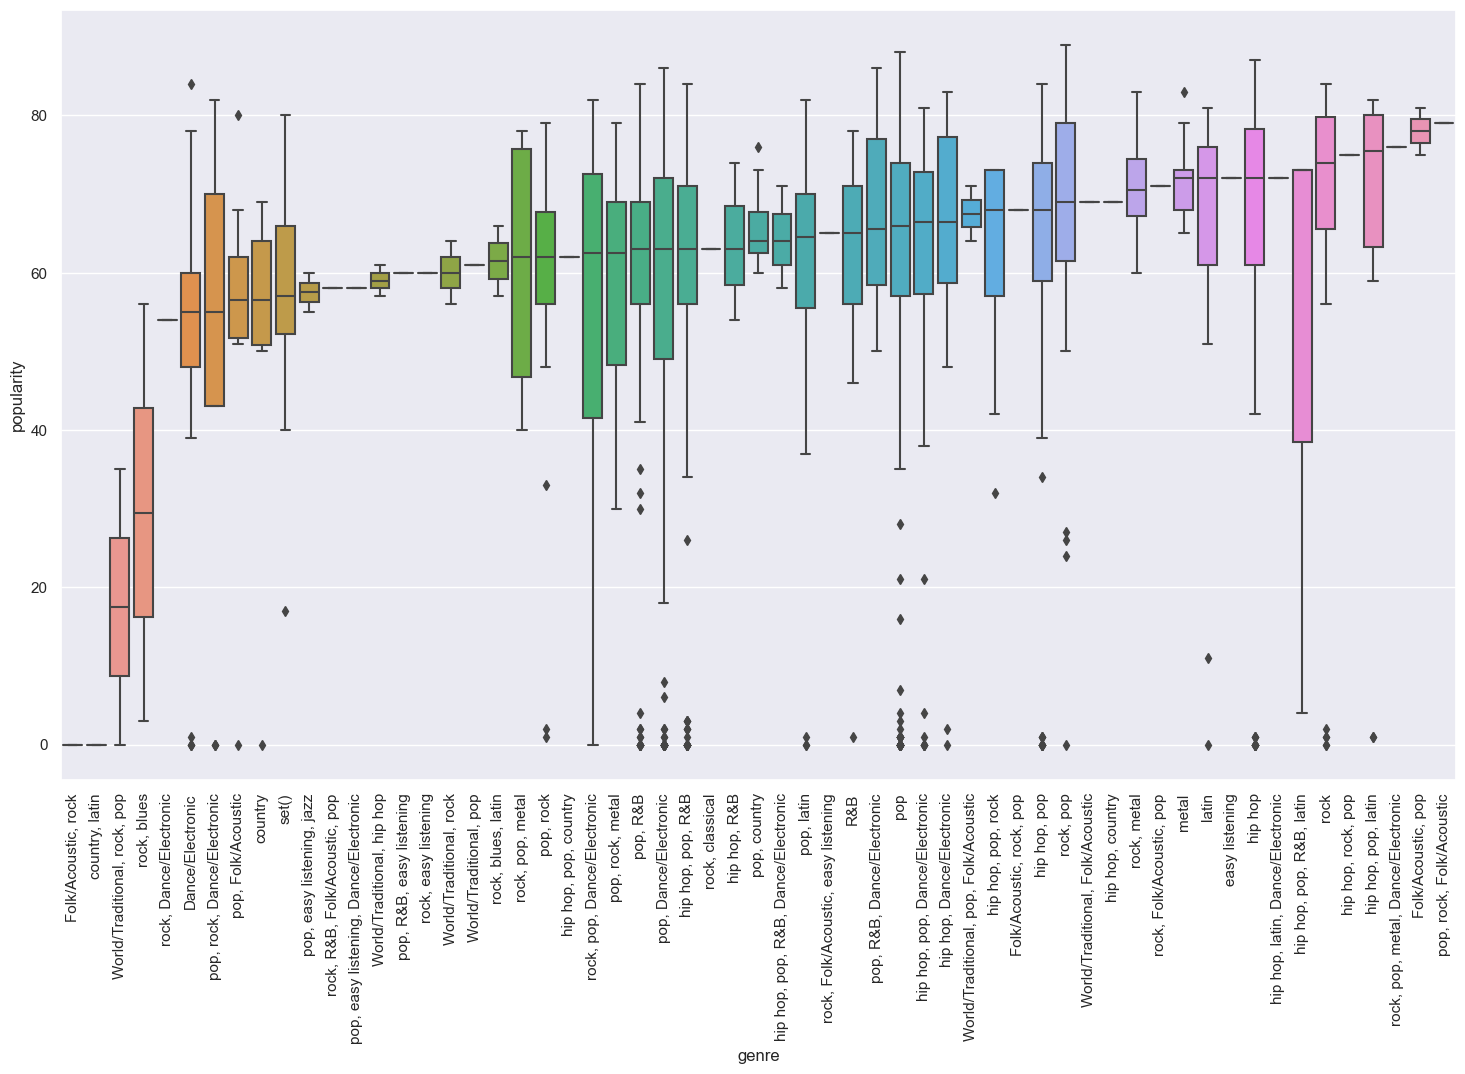

In [8]:
sorted_genre_by_pop = df.groupby("genre")["popularity"].median().sort_values()
fig, ax = plt.subplots(1, 1, figsize=(18,10))
ax.tick_params(axis='x', rotation=90)
sns.boxplot(data=df, x="genre", y="popularity", order=[*sorted_genre_by_pop.index]);

<AxesSubplot:xlabel='popularity', ylabel='danceability'>

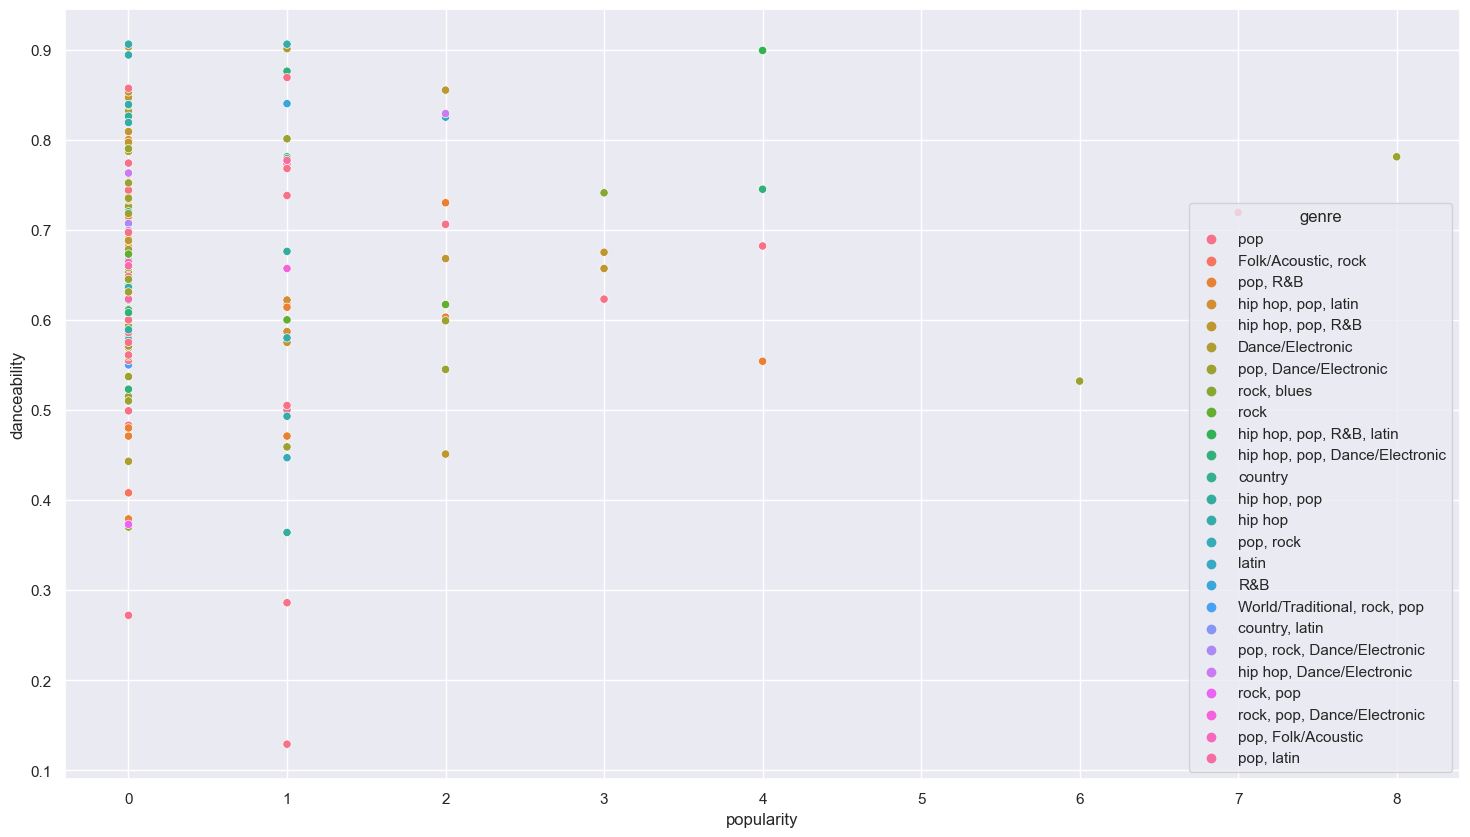

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(18,10))
sns.scatterplot(data=df[df['popularity'] < 1], y='danceability', x='popularity', hue='genre')

`set()`?

In [18]:
df[df['genre'] == 'set()'].head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
95,Wheatus,Teenage Dirtbag,241666,True,1999,71,0.625,0.850,4,-3.904,1,0.0495,0.346000,0.000233,0.1740,0.633,94.661,set()
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,False,2002,66,0.607,0.923,1,-6.777,1,0.0948,0.019300,0.000001,0.0924,0.868,184.819,set()
291,Blazin' Squad,Crossroads - Radio Edit,188693,False,2012,40,0.661,0.746,4,-5.153,1,0.0420,0.109000,0.000000,0.3250,0.502,144.188,set()
428,George Michael,Amazing,265826,False,2004,57,0.805,0.754,10,-6.825,0,0.0394,0.088400,0.000002,0.1170,0.880,128.429,set()
455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,False,2004,51,0.853,0.911,11,-6.722,0,0.1250,0.043600,0.005710,0.2870,0.802,131.012,set()
481,Eamon,Fuck It (I Don't Want You Back),225106,True,2004,64,0.828,0.653,0,-6.245,0,0.0653,0.214000,0.000003,0.0404,0.575,68.507,set()
545,Brian McFadden,Almost Here,229826,False,2004,42,0.561,0.452,9,-7.324,0,0.0336,0.409000,0.000000,0.1060,0.316,77.984,set()
645,Meck,Thunder in My Heart Again (Radio Edit),189800,False,2005,46,0.679,0.922,2,-4.670,0,0.0294,0.000241,0.690000,0.0697,0.806,129.016,set()
710,Ida Corr,Let Me Think About It,151973,False,2012,43,0.762,0.754,0,-3.425,0,0.0460,0.000220,0.066500,0.1460,0.715,129.026,set()
729,Camille Jones,The Creeps - Fedde Le Grand Radio Mix,152333,False,2006,17,0.847,0.861,6,-6.632,1,0.0603,0.278000,0.029000,0.0626,0.724,127.894,set()


In [19]:
genres = set()
for several_genres in [*sorted_genre_by_pop.index]:
    for genre in several_genres.split(", "):
        genres.add(genre)
genres.remove('set()')

In [20]:
genres

{'Dance/Electronic',
 'Folk/Acoustic',
 'R&B',
 'World/Traditional',
 'blues',
 'classical',
 'country',
 'easy listening',
 'hip hop',
 'jazz',
 'latin',
 'metal',
 'pop',
 'rock'}

In [21]:
genre_dfs = {}
for genre in genres:
    genre_dfs[genre] = pd.DataFrame([*filter(lambda x : genre in x[17], df.values)], columns=df.columns)

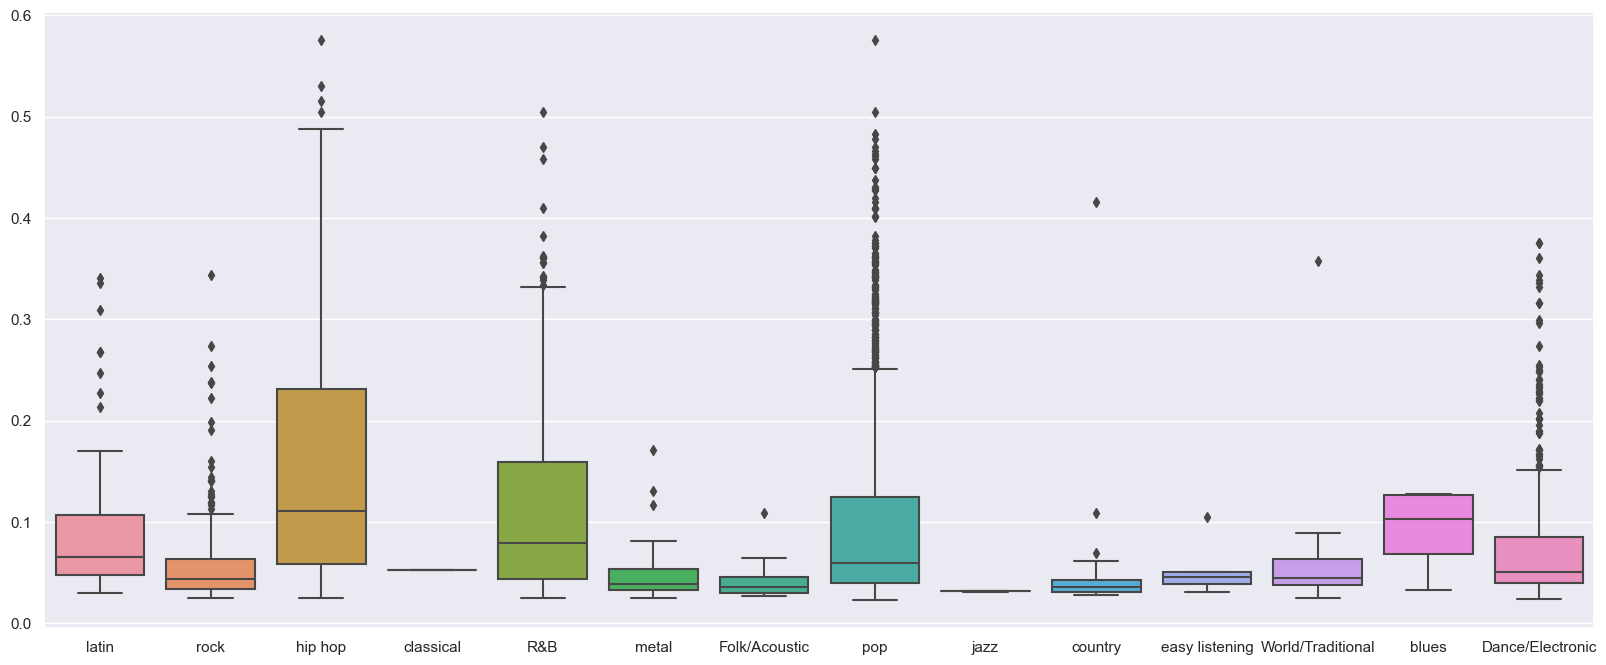

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(20,8))

i = 0
genre_dfs_pop_list = []
for key, val in genre_dfs.items():
    genre_dfs_pop_list.append(genre_dfs[key]["speechiness"])
    #axs[i].set_xlabel(key)
    i += 1
sns.boxplot(genre_dfs_pop_list)
plt.xticks([i for i in range(14)], genre_dfs.keys());

In [30]:
genre_dfs['classical']

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,KALEO,Way down We Go,219560,False,2015,63,0.59,0.578,10,-5.798,0,0.0528,0.612,0.000162,0.0837,0.264,81.663,"rock, classical"
